In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 19
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 10 		 0.06 		 0.33 |
| 10 		 0.19 		 0.4 |
| 10 		 0.66 		 0.06 |
| 10 		 0.25 		 0.58 |
| 10 		 0.55 		 0.06 |
| 10 		 0.14 		 0.44 |
| 10 		 0.21 		 0.4 |
| 10 		 0.87 		 0.94 |
| 10 		 0.58 		 0.28 |
| 10 		 0.86 		 0.8 |
| 10 		 0.28 		 0.11 |
| 10 		 0.09 		 0.03 |
| 10 		 0.55 		 0.13 |
| 10 		 0.19 		 0.06 |
| 10 		 0.07 		 0.3 |
| 10 		 0.42 		 0.84 |
| 10 		 0.7 		 0.51 |
| 10 		 0.64 		 0.17 |
| 10 		 0.28 		 0.26 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.26
The s.d. of I is: 0.25
-------------------------------------
The mean of M is: 10
The mean of E is: 0.39
The mean of I is: 0.4
-------------------------------------


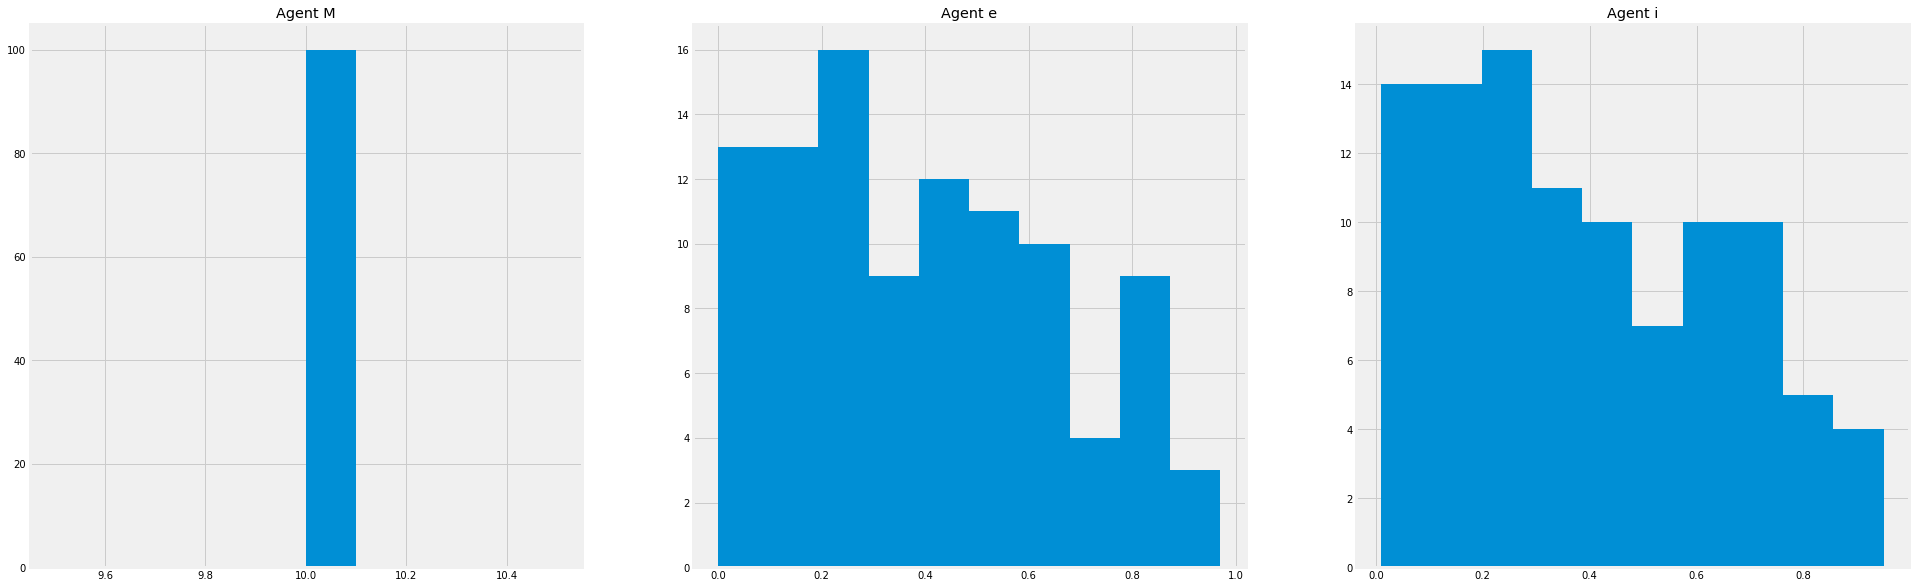

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 0.6, Temptation: 1.23, Sucker: 0, Punishment: 0.63
Agent 1 playing Agent 0: Reward: 1.9, Temptation: 2.14, Sucker: 0, Punishment: 0.24
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 0.6, Temptation: 2.78, Sucker: 0, Punishment: 2.18
Agent 2 playing Agent 0: Reward: 6.6, Temptation: 6.64, Sucker: 0, Punishment: 0.04
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 0.6, Temptation: 1.43, Sucker: 0, Punishment: 0.82
Agent 3 playing Agent 0: Reward: 2.5, Temptation: 2.85, Sucker: 0, Punishme

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [10, 1/10000]
E = [0.3, 0.3]
I = [0.3, 0.3]

agents = get_agents(homogenous = False, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 19 minutes.
    S.D.  Counts
0    0.5     247
1    0.6     213
2    0.7     192
3    0.8     183
4    0.9     189
5    1.0     169
6    1.1     177
7    1.2     148
8    1.3     135
9    1.4     118
10   1.5      76
11   1.6      62
12   1.7      48
13   1.8      38
14   1.9      35
15   2.0      22
16   2.1      13
17   2.2       6
18   2.3      11
19   2.4      13
20   2.5      18
21   2.6      11
22   2.7       7
23   2.8       8
24   2.9       6
25   3.0       5


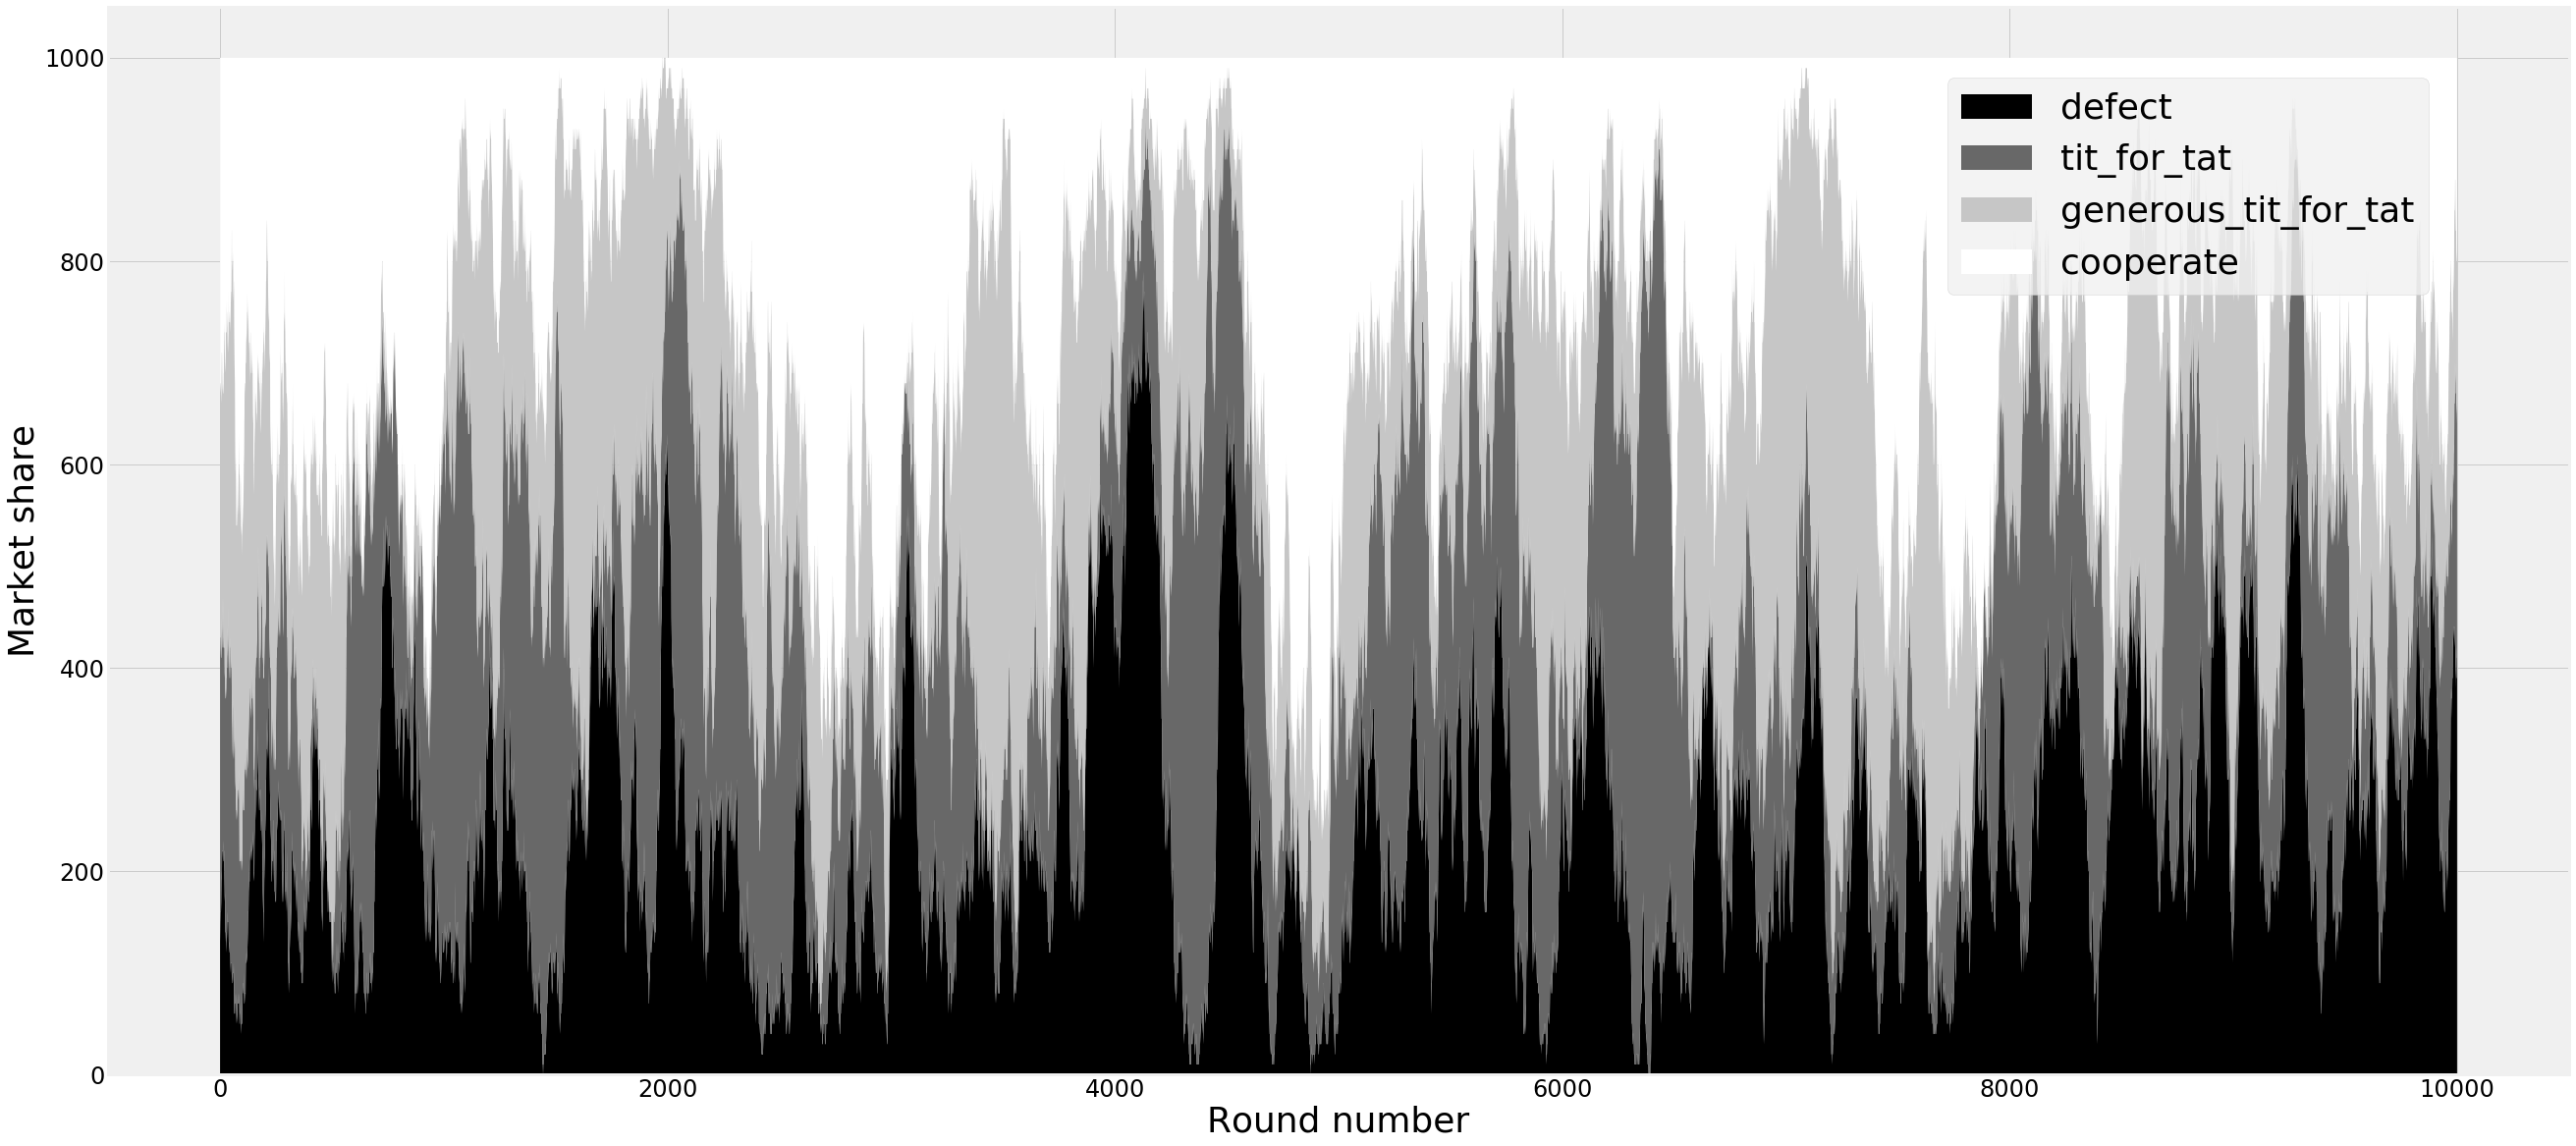

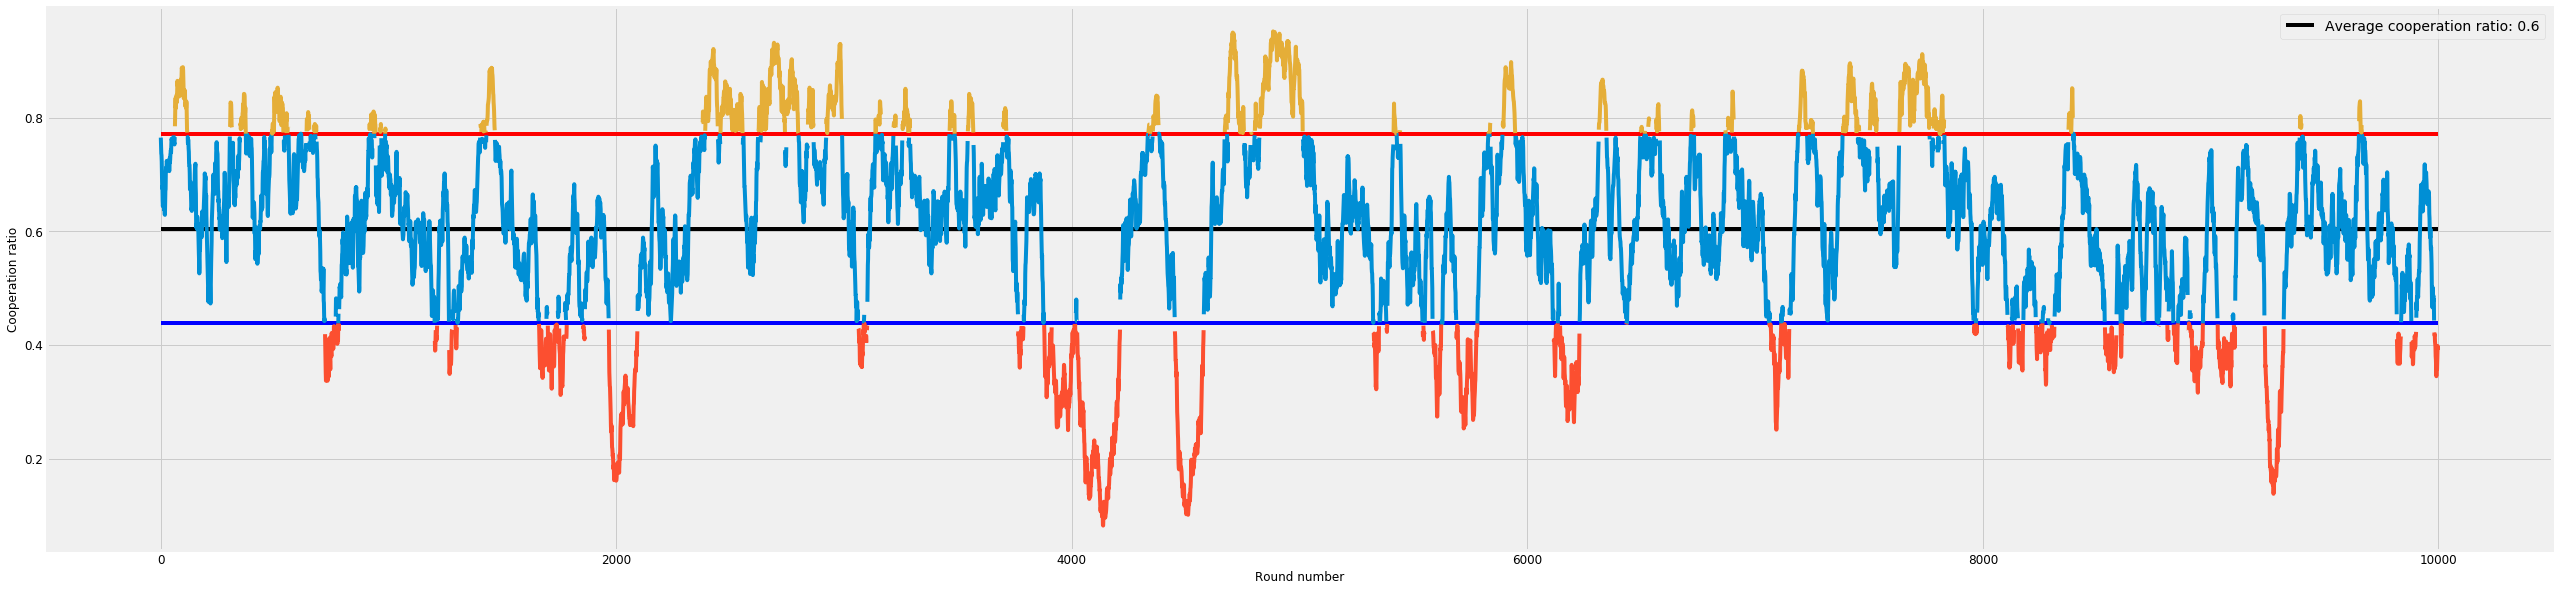

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("data/outliers/" + str(seed) + "_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, seed = str(seed))